Libraries 

In [4]:
#for giving an array 
import numpy as np
#for Data Analysis
import pandas as pd
#For drawing 2D Graphs
import matplotlib.pyplot as plt
%matplotlib inline
#for naive bayes (for importing navie bayes here we are using Gaussian NB: It’s specifically used when the features have continuous values.)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
#For getting accuracy 
from sklearn import metrics
#Confusion matrix for summary
from sklearn.metrics import confusion_matrix

Reading File for the Training Data

In [7]:
#Reading the file
traindata = pd.read_csv("data1.csv")
#getting top 5 rows from dataframe
traindata.head()

,Exam 1,Exam 2,Admitted
0,34.6237,78.0247,0
1,30.2867,43.8950,0
2,35.8474,72.9022,0
3,45.0833,56.3164,0
4,95.8616,38.2253,0


Seeing the Statistical information


In [8]:
traindata.describe()

,Exam 1,Exam 2,Admitted
count,80.000000,80.000000,80.000000
mean,65.825728,66.990266,0.625000
std,19.103991,18.374108,0.487177
min,30.286700,30.603300,0.000000
25%,51.422725,49.567325,0.000000
50%,67.345650,69.202650,1.000000
75%,80.006150,79.067225,1.000000
max,99.827900,98.869400,1.000000


Reading File For the Testing Data

In [10]:
#Reading the file
testdata = pd.read_csv(r"data2.csv")
#Getting the top 5 rows from data
testdata.head()

,Exam 1,Exam 2,Admitted
0,30.0588,49.5930,0
1,44.6683,66.4501,0
2,66.5609,41.0921,0
3,49.0726,51.8832,0
4,32.7228,43.3072,0


In [11]:
#Creating Variable i.e ytrain for admitted column
ytrain = traindata['Admitted']
#Creating Variable i.e ytest for admitted column
ytest = testdata['Admitted']

In [12]:
#Dropping column i.e admitted for prediction
traindata = traindata.drop('Admitted', axis =1)
testdata = testdata.drop('Admitted', axis =1)

In [13]:
#I create a gaussian naive bayes classifier object
gnb = GaussianNB()
#Then Fit train data to classifier
testpred = gnb.fit(traindata, ytrain)
#Predict on train data
trainpred = gnb.predict(traindata)
#Getting the accuracy on the training data
print("Gaussian Naive Bayes model accuracy on Training Data (in %):", metrics.accuracy_score(ytrain, trainpred)*100)
#Predict on test data
testpred = gnb.predict(testdata)
#Getting the accuracy on the testing data
print("Gaussian Naive Bayes model accuracy on Testing Data (in %):", metrics.accuracy_score(ytest, testpred)*100)

Gaussian Naive Bayes model accuracy on Training Data (in %): 93.75
Gaussian Naive Bayes model accuracy on Testing Data (in %): 90.0


In [19]:
#Accuracy,Sensitivity,Specificity on Training Data
#Creating the Confusion Matrix
cm2= confusion_matrix(ytrain,trainpred)
total2=sum(sum(cm2))
#Calculating the accuracy
accuracy2=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)
#Calculating the sensitivity
sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )
#Calculating the specificity
specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)

Accuracy :  0.9375
Sensitivity :  0.9
Specificity :  0.96


In [15]:
#Accuracy,Sensitivity,Specificity on Testing Data
#Creating the Confusion Matrix
cm1= confusion_matrix(ytest,testpred)
total1=sum(sum(cm1))
#Calculating the accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)
#Calculating the sensitivity
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
#Calculating the specificity
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9
Sensitivity :  0.9
Specificity :  0.9


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


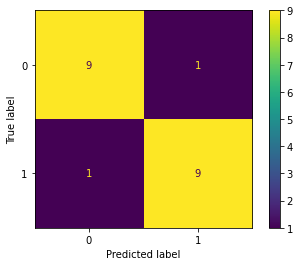

In [16]:
#Confusion Matrix is the number of correct and incorrect predictions made by a classifier
plot_confusion_matrix(gnb, testdata, ytest)

Two of the results are incorrectly predicted and 18 results are predicted correctly.

In [20]:
graph_stats = pd.DataFrame(columns = ['Probability','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(ytest,testpred)
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    graph_stats.loc[i] = [i, Accuracy, Sensitivity, Specificity]

graph_stats

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.9,0.9,0.9
0.1,0.1,0.9,0.9,0.9
0.2,0.2,0.9,0.9,0.9
0.3,0.3,0.9,0.9,0.9
0.4,0.4,0.9,0.9,0.9
0.5,0.5,0.9,0.9,0.9
0.6,0.6,0.9,0.9,0.9
0.7,0.7,0.9,0.9,0.9
0.8,0.8,0.9,0.9,0.9
0.9,0.9,0.9,0.9,0.9
